# Predicting Heart Disease Using Machine Learning

This notebook looks into using varaious python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on medical attributes.

We are going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the UCI machine learning repository https://archive.ics.uci.edu/dataset/45/heart+disease

## Evaluation

> If we can reach 95% accuracy prredicting whether the person has heart disease during the proof of concept, we will pursue the project

## Features

This is where you will get different information about each of the features in your data.You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

*** Create data dictionary ***

 1.age - age in years
 
 2.sex - (1 = male; 0 = female)
 
 3.cp - chest pain type
   0: Typical angina: chest pain related decrease blood supply to the heart
   
   1: Atypical angina: chest pain not related to heart
   
   2: Non-anginal pain: typically esophageal spasms (non heart related)
   
   3: Asymptomatic: chest pain not showing signs of disease
   
 4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically      cause for concern
 
 5.chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
    
 6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
   
 7.restecg - resting electrocardiographic results
   0: Nothing to note
   1: ST-T Wave abnormality
      can range from mild symptoms to severe problems
      signals non-normal heart beat
   2: Possible or definite left ventricular hypertrophy
      Enlarged heart's main pumping chamber
      
 8.thalach - maximum heart rate achieved
 
 9.exang - exercise induced angina (1 = yes; 0 = no)
 10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise             unhealthy heart will stress more
 
 11.slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
    
 12.ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
    
 13.thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising  
    
 14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)







## Preparing the tools

we are going to use pandas, matplotlib and NumPy for data analysis and manipulation


In [76]:
#import all the tools we need

#Regular EDA (Exploratory data analysis) plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to appear inside the notebook
%matplotlib inline 

#Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc



## Load data

In [5]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis)

The goal here is to find out mroe about the data and become a subject export on the dataset you are workign with
1. What questions are you trying to solve?
2. what kind of dat do we have and how do we treat different types?
3. what's missing from the data and how we will deal with it?
4. What are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of data?

In [6]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

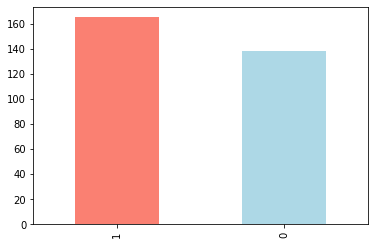

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:

# compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


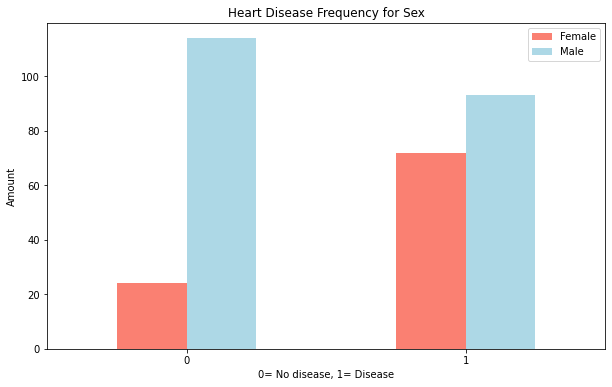

In [14]:
#create a plot of cross tab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10, 6), color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [15]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

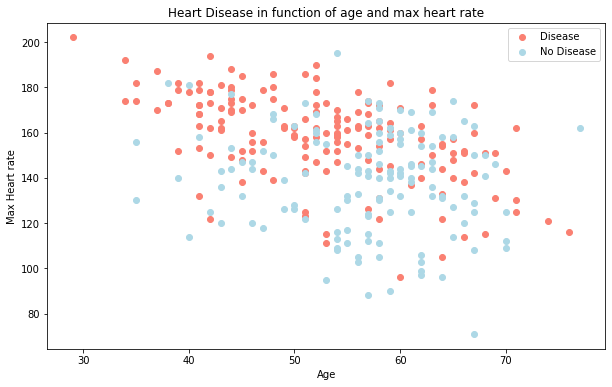

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);

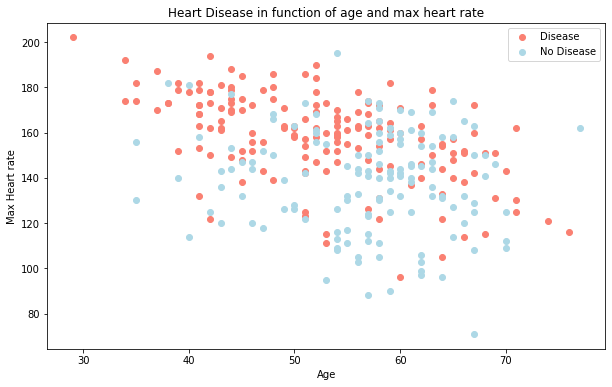

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);

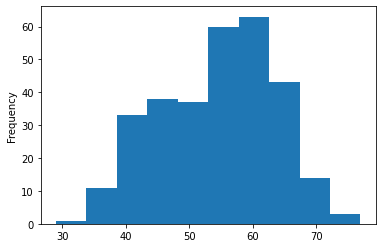

In [19]:
#check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per chhest pain type
cp - chest pain type

   0: Typical angina: chest pain related decrease blood supply to the heart
   
   1: Atypical angina: chest pain not related to heart
   
   2: Non-anginal pain: typically esophageal spasms (non heart related)
   
   3: Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


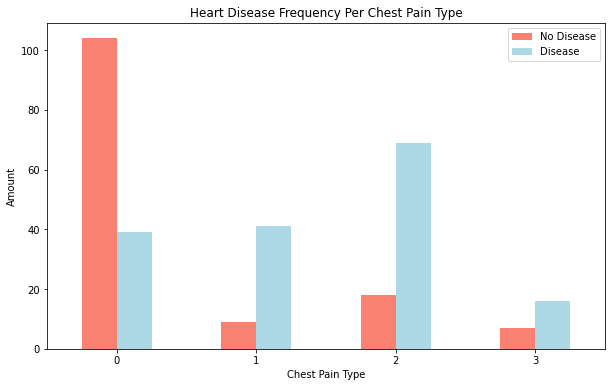

In [24]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);

#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Make a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


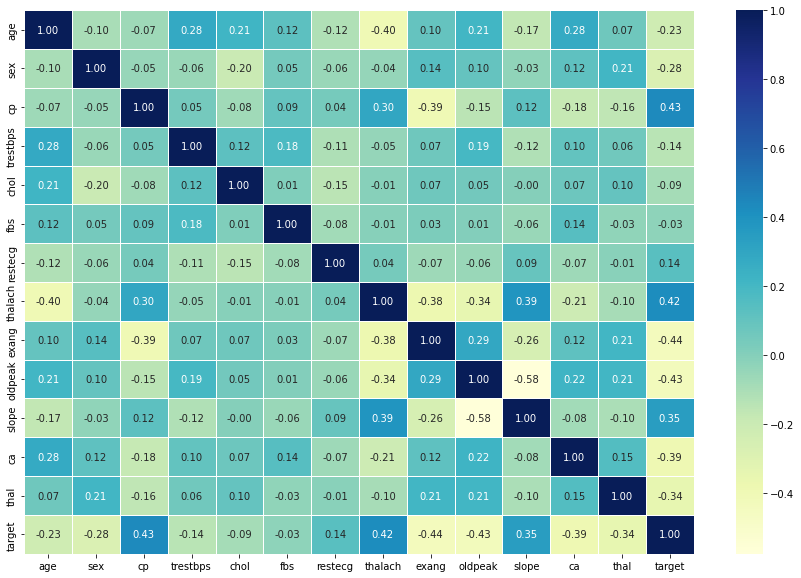

In [32]:
# Let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
bottom, top=ax.get_ylim()

### Modelling

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
#Split the data in to fetures and labels
x=df.drop("target",axis=1)
y=df["target"]

In [37]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [40]:
#Spli the data in to training andtest data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train, len(x_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 109   50    0   0       110   254    0        0      159      0      0.0   
 63    41    1   1       135   203    0        1      132      0      0.0   
 204   62    0   0       160   164    0        0      145      0      6.2   
 239   35    1   0       126   282    0        0      156      1      0.0   
 175   40    1   0       110   167    0        0      114      1      2.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 79    58    1   2       105   240    0        0      154      1      0.6   
 0     63    1   3       145   233    1        0      150      0      2.3   
 43    53    0   0       130   264    0        0      143      0      0.4   
 126   47    1   0       112   204    0        1      143      0      0.1   
 199   65    1   0       110   248    0        0      158      0      0.6   
 
      slope  ca  thal  
 109      2   0     2  
 63       1   0     1  
 2

In [43]:
y_train, len(y_train)

(109    1
 63     1
 204    0
 239    0
 175    0
       ..
 79     1
 0      1
 43     1
 126    1
 199    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got data split in to training and testing set.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

We are going to ret 3 different machine learning models:

1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier


In [45]:
#Put models in a dictionary

models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictof different Scikit-Learn machine learning models
    x_train: training data( no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #Set random seed
    np.random.seed(42)
    
    #Make a list to keep model scores
    model_scores={}
    
    #Loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores




In [46]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)

model_scores

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8524590163934426}

### Model Comparision

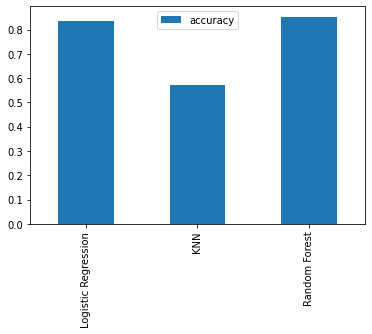

In [47]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got baselline model..... and we know a model's first predictions arren't always what we should based our next steps off. what should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1Score
* Classification Report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning ( By Hand )

In [49]:
# Lets tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbours
neighbors= range(1,21)

#Settup KNN instance
knn= KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))

    # Update the testing scores list
    test_scores.append(knn.score(x_test,y_test))

In [50]:
train_scores

[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7644628099173554,
 0.7892561983471075,
 0.7603305785123967,
 0.7644628099173554,
 0.7520661157024794,
 0.743801652892562,
 0.7272727272727273,
 0.7272727272727273,
 0.7024793388429752,
 0.7066115702479339,
 0.7024793388429752,
 0.731404958677686,
 0.7066115702479339,
 0.71900826446281,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752]

In [51]:
test_scores

[0.5081967213114754,
 0.6229508196721312,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.5901639344262295,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803]

Maximum KNN score on the test data: 65.57%


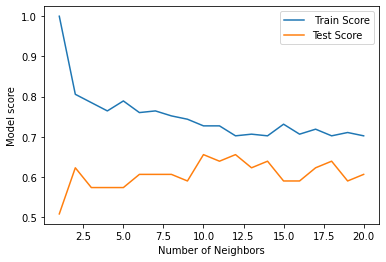

In [53]:
plt.plot(neighbors, train_scores, label=" Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score");
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
 We are going to tune:
 
 * LogisticRegression()
 
 * RandomForestClassifier() 
 
  ...using RandomizedSearchCV

In [61]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid= {"n_estimators": np.arange(10,1000,50),
         "max_depth":[None, 3, 5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our mdoels

Lets tune tem using RandomizedSearchCV..

In [57]:
# Tune Logistic Regression

np.random.seed(42)

#SEttup random hyperparameters search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fit random hyperparameter search model for logistic Regression

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [59]:
rs_log_reg.score(x_test,y_test)

0.8360655737704918

Now we have tuned LogisticRegression(), lets do the same for the RandomForestClassifier()

In [62]:
#Setup random see
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20, verbose=True)

#Fit random hyperparameter search model gor RanmdomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [64]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [65]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8524590163934426}

## Hyperprameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we will try and improve them again using GridSearchCV

In [67]:
#Different Hyperparameters for our LogisticREgression() model`m
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Settup grid hyperparameter search for LogisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
#check the best hyperparamters
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
gs_log_reg.score(x_test,y_test)

0.8360655737704918

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 scor

.... and i would be great if cross validation was used where possible.

To make comparions and evaluate our trained model, first we need to make predicitins

In [70]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)

In [71]:
y_preds

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [72]:
y_test

195    0
124    1
34     1
247    0
4      1
      ..
144    1
102    1
90     1
260    0
293    0
Name: target, Length: 61, dtype: int64

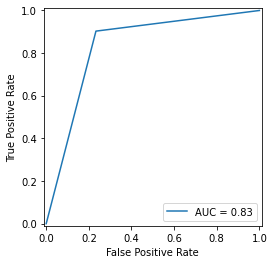

In [81]:
#import ROC curve and calculate AUC metric
fpr, tpr, _ = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot();

In [83]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[23  7]
 [ 3 28]]


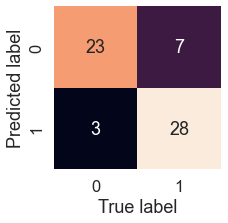

In [85]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now we have got a ROC curve, an AUC metric and a cnfusion matrix, let's get a classification report as well as cross validated precision, recall and f1 score

In [86]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Calculate evaluation metrics using cross-validation
we are going to calculate precision, recall and f1 score of our model using cross validation and to do so we will be using cross_val_score()

In [87]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [88]:
#create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418,solver="liblinear" )


In [92]:
# cross validated accurcy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [93]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [95]:
#cross validated  precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [96]:
#cross validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [97]:
#cross validated f1 score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

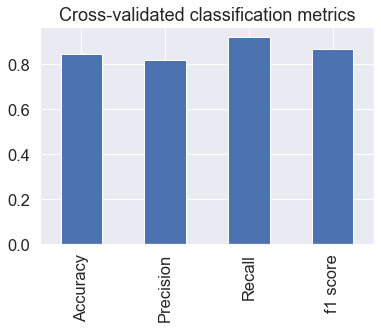

In [98]:
#Visualize our cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "f1 score":cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature importance

Feature importance is another way of asking "Which features contributed most to the outcomes of the model and how they contribute?"

One way to find feature importance is to search for "(MODEL NAME) feature importance

Finding feature importance is different for each machine learning model

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
#Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
clf.coef_

array([[ 0.01237662, -0.87804664,  0.61160566, -0.0112634 , -0.00717371,
        -0.10348975,  0.32336685,  0.03079136, -0.5707283 , -0.52681713,
         0.21855251, -0.61202299, -0.49901634]])

In [105]:
#Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.012376616522705813,
 'sex': -0.8780466398210051,
 'cp': 0.6116056589627922,
 'trestbps': -0.01126339813705366,
 'chol': -0.007173707067750705,
 'fbs': -0.10348974972613655,
 'restecg': 0.32336685296963635,
 'thalach': 0.03079136142906555,
 'exang': -0.570728304441466,
 'oldpeak': -0.5268171333692773,
 'slope': 0.21855250885127936,
 'ca': -0.6120229908509,
 'thal': -0.49901634449557014}

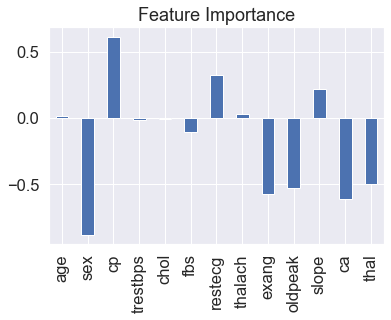

In [106]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [107]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [108]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask youself....

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could we improve current models?
* If your model is good enough
